#Rede Neural LSTM para Classificação de E-mails como Spam ou Não Spam

(Email Spam Classification Dataset)

Fonte: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

Guilherme Honório Caetano - 2022102201940254

###Bibliotecas necessárias

Todas as requisições necessárias para funcionamento ideal do Software

In [ ]:
#Bibliotecas necessárias
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Baixar os recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###Montar Google Drive

Essa etapa não é necessária caso esteja utilizando sua própria máquina para execução do software.

In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset

Atribua à variável "dataset" o caminho da pasta onde você salvou o dataset, lembre-se de realizar o download através do link disponibilizado.

In [ ]:
# Caminho do arquivo CSV.
dataset = '/content/drive/MyDrive/dataset/emails.csv'
# Lê o CSV e carrega em um DataFrame.
data = pd.read_csv(dataset)
# Exibe mensagem de sucesso.
print("Dados importados com sucesso!\n")
# Mostra o DataFrame no notebook.
display(data)

Dados importados com sucesso!



,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


##Pré-Processamento

###Removendo coluna Email No.

In [ ]:
# Remove a coluna 'Email No.' se existir.
if 'Email No.' in data.columns:
    data = data.drop('Email No.', axis=1)

# Exibe mensagem de sucesso.
print("Coluna removida com sucesso!\n")

# Mostra o DataFrame atualizado.
display(data)

Coluna removida com sucesso!



,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


###Removendo StopWords

In [ ]:
# Define o conjunto de stopwords e lista personalizada de palavras para remoção
stop_words = set(stopwords.words('english'))
custom_words = {
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p",
    "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "www", "http", "com", " ", "_",
    "aa", "bb", "cc", "dd", "ee", "ff", "gg", "hh", "ii", "jj", "kk", "ll", "mm", "-",
    "nn", "oo", "pp", "qq", "rr", "ss", "tt", "uu", "vv", "ww", "xx", "yy", "zz"
}

# Combina stopwords com palavras personalizadas
words_to_remove = stop_words.union(custom_words)

# Remove as colunas indesejadas
filtered_data = data.loc[:, ~data.columns.isin(words_to_remove)]

# Atribuindo filtro de palavras à base de dados
data = filtered_data

# Mostra as 5 primeiras linhas do DataFrame filtrado
display(data.head(n=5))

,ect,hou,enron,gas,deal,meter,hpl,please,corp,know,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry,Prediction
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,1,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,2,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##Balanceamento de Classe

###Plotagem da Classes

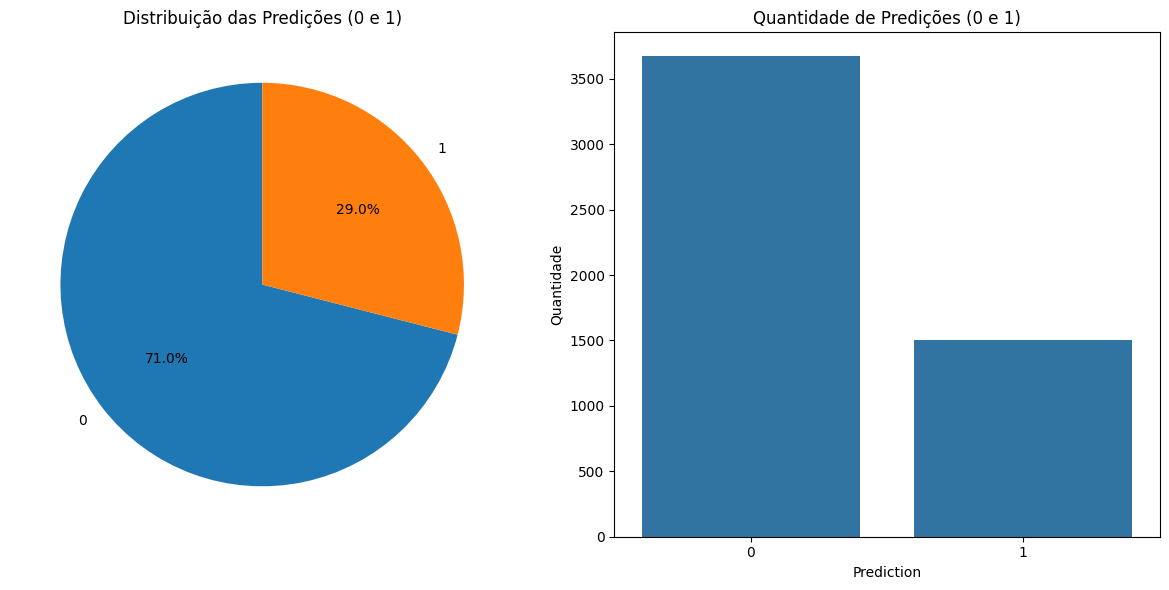

In [ ]:
# Contagem das predições 0 e 1
prediction_counts = data['Prediction'].value_counts()

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza
axes[0].pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribuição das Predições (0 e 1)')

# Gráfico de barras
sns.countplot(x='Prediction', data=data, ax=axes[1])
axes[1].set_title('Quantidade de Predições (0 e 1)')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Quantidade')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

###Balanceamento

In [ ]:
# Separar as classes
class_0 = data[data['Prediction'] == 0]
class_1 = data[data['Prediction'] == 1]

# Obter o número de amostras na classe minoritária
minority_class_size = min(len(class_0), len(class_1))

# Amostrar aleatoriamente a classe majoritária para igualar o tamanho da classe minoritária
if len(class_0) > len(class_1):
  class_0_downsampled = class_0.sample(n=minority_class_size, random_state=42)  # random_state para reprodutibilidade
  balanced_data = pd.concat([class_0_downsampled, class_1])
elif len(class_1) > len(class_0):
  class_1_downsampled = class_1.sample(n=minority_class_size, random_state=42)
  balanced_data = pd.concat([class_0, class_1_downsampled])
else:
  balanced_data = data.copy() # já está balanceado

#atribuindo balanceamento ao dataset
data = balanced_data

# Verificar o balanceamento
print(data['Prediction'].value_counts())

Prediction
0    1500
1    1500
Name: count, dtype: int64


###Plotagem de classe balanceada

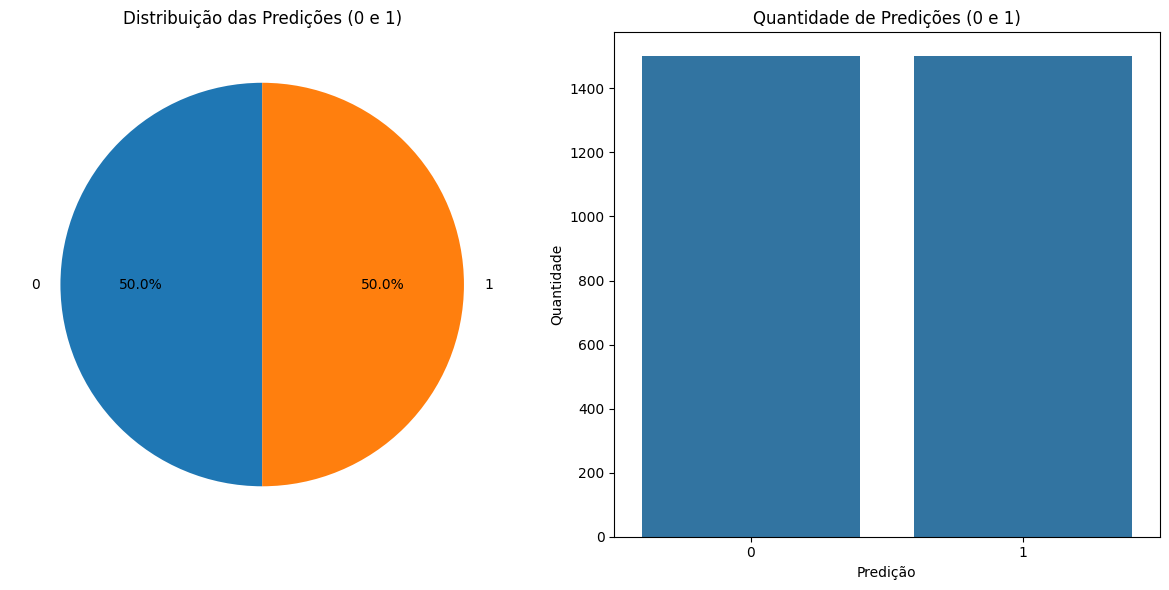

In [ ]:
# Contagem das predições 0 e 1
prediction_counts = data['Prediction'].value_counts()

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza
axes[0].pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribuição das Predições (0 e 1)')

# Gráfico de barras
sns.countplot(x='Prediction', data=data, ax=axes[1])
axes[1].set_title('Quantidade de Predições (0 e 1)')
axes[1].set_xlabel('Predição')
axes[1].set_ylabel('Quantidade')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

###Separando aleatoriamente o conjunto de dados em treino (80%) e teste (20%)

In [ ]:
# Embaralha os dados aleatoriamente
data_shuffled = data.sample(frac=1, random_state=42)  # random_state para reprodutibilidade

# Define a proporção de treino e teste (80% para treino, 20% para teste)
train_size = int(0.8 * len(data_shuffled))

# Divide os dados em conjuntos de treino e teste
train_data = data_shuffled[:train_size]
test_data = data_shuffled[train_size:]

# Separa as features (X) e o target (y) para treino e teste
X_train = train_data.drop('Prediction', axis=1)
y_train = train_data['Prediction']
X_test = test_data.drop('Prediction', axis=1)
y_test = test_data['Prediction']

# Função para padronizar os dados
def standardize_data(data):
    data_standardized = data.copy()  # Faz uma cópia para evitar modificar o original
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):  # Verifica se a coluna é numérica
            mean = data[column].mean()
            std = data[column].std()
            if std != 0:  # Evita divisão por zero se o desvio padrão for zero
                data_standardized[column] = (data[column] - mean) / std
            else:
                data_standardized[column] = 0  # Substitui por 0 caso todas as observações sejam iguais
    return data_standardized

# Padroniza os dados
X_train = standardize_data(X_train)
X_test = standardize_data(X_test)

print("Dados de treino:", X_train.shape, y_train.shape)
print("Dados de teste:", X_test.shape, y_test.shape)

Dados de treino: (2400, 2839) (2400,)
Dados de teste: (600, 2839) (600,)


##LSTM: Implementação

-Inicialização de pesos

-Funções de Ativação

-Feedforward

-Backpropagation

+Dropout

+L2 Regularization

In [ ]:
class LSTM:
    # Inicialização da LSTM
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.3, lambda_l2=0.01):
        # Parâmetros de entrada: tamanho da entrada, tamanho da camada oculta, tamanho da saída, taxa de dropout e regularização L2
        self.input_size = input_size  # Tamanho da entrada
        self.hidden_size = hidden_size  # Número de unidades na camada oculta
        self.output_size = output_size  # Tamanho da saída
        self.dropout_rate = dropout_rate  # Taxa de dropout
        self.lambda_l2 = lambda_l2  # Regularização L2

        # Inicialização dos pesos
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size) * 0.01  # Pesos para a forget gate
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size) * 0.01  # Pesos para a input gate
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size) * 0.01  # Pesos para a output gate
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size) * 0.01  # Pesos para a célula (memória)
        self.Why = np.random.randn(output_size, hidden_size) * 0.01  # Pesos para a saída

        # Inicialização dos vieses
        self.bf = np.zeros((hidden_size, 1))  # Bias para a forget gate
        self.bi = np.zeros((hidden_size, 1))  # Bias para a input gate
        self.bo = np.zeros((hidden_size, 1))  # Bias para a output gate
        self.bc = np.zeros((hidden_size, 1))  # Bias para a célula (memória)
        self.by = np.zeros((output_size, 1))  # Bias para a saída

    # Função sigmoide
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))  # Retorna a função sigmoide aplicada a x

    # Derivada da função sigmoide
    def sigmoid_derivative(self, x):
        return x * (1 - x)  # Derivada da sigmoide

    # Função tangente hiperbólica
    def tanh(self, x):
        return np.tanh(x)  # Retorna a tangente hiperbólica de x

    # Derivada da tangente hiperbólica
    def tanh_derivative(self, x):
        return 1 - x ** 2  # Derivada da tangente hiperbólica

    # Passagem para frente (forward propagation)
    def forward(self, inputs, training=True):
        h = np.zeros((self.hidden_size, 1))  # Estado oculto inicial (h0)
        c = np.zeros((self.hidden_size, 1))  # Estado da célula inicial (c0)

        self.last_inputs = inputs  # Armazena as entradas
        self.last_hs = {0: h}  # Armazena os estados ocultos (no início é h0)
        self.last_cs = {0: c}  # Armazena os estados da célula (no início é c0)
        self.gates = []  # Para armazenar os valores dos gates

        # Passo para cada entrada da sequência
        for i, x in enumerate(inputs):
            x = x.reshape(-1, 1)  # Reshape da entrada
            combined = np.vstack((x, h))  # Combina a entrada e o estado oculto para cálculos dos gates

            # Forget gate
            ft = self.sigmoid(np.dot(self.Wf, combined) + self.bf)  # Calculo do forget gate

            # Input gate
            it = self.sigmoid(np.dot(self.Wi, combined) + self.bi)  # Calculo do input gate
            c_tilde = self.tanh(np.dot(self.Wc, combined) + self.bc)  # Calculo da célula candidata

            # Atualização da memória da célula
            c = ft * c + it * c_tilde  # Atualiza o estado da célula

            # Output gate
            ot = self.sigmoid(np.dot(self.Wo, combined) + self.bo)  # Calculo do output gate
            h = ot * self.tanh(c)  # Atualiza o estado oculto com a memória

            # Dropout (apenas durante o treinamento)
            if training:
                mask = np.random.binomial(1, 1 - self.dropout_rate, h.shape)  # Máscara de dropout
                h *= mask  # Aplica o dropout

            # Armazena os estados e gates
            self.last_hs[i + 1] = h
            self.last_cs[i + 1] = c
            self.gates.append((ft, it, c_tilde, ot))

        # Saída com ativação sigmoide
        y = self.sigmoid(np.dot(self.Why, h) + self.by)  # Cálculo da saída
        return y, h  # Retorna a previsão e o estado oculto final

    # Backpropagation (retropropagação)
    def backprop(self, d_y, learn_rate=0.001):
        n = len(self.last_inputs)  # Número de entradas
        d_Why = np.dot(d_y, self.last_hs[n].T)  # Gradiente para o peso Why
        d_by = d_y  # Gradiente para o bias by
        d_h = np.dot(self.Why.T, d_y)  # Gradiente para o estado oculto

        # Inicialização dos gradientes dos pesos e vieses
        d_Wf = np.zeros_like(self.Wf)
        d_Wi = np.zeros_like(self.Wi)
        d_Wo = np.zeros_like(self.Wo)
        d_Wc = np.zeros_like(self.Wc)
        d_bf = np.zeros_like(self.bf)
        d_bi = np.zeros_like(self.bi)
        d_bo = np.zeros_like(self.bo)
        d_bc = np.zeros_like(self.bc)

        d_c_next = np.zeros_like(self.last_cs[0])  # Gradiente da célula para o próximo passo
        d_h_next = np.zeros_like(self.last_hs[0])  # Gradiente do estado oculto para o próximo passo

        # Backpropagation nos passos anteriores
        for t in reversed(range(n)):
            ft, it, c_tilde, ot = self.gates[t]  # Recupere os valores dos gates
            c = self.last_cs[t + 1]  # Estado da célula no passo t+1
            c_prev = self.last_cs[t]  # Estado da célula no passo t

            d_h += d_h_next  # Acumula o gradiente do estado oculto
            d_c = d_h * ot * self.tanh_derivative(np.tanh(c)) + d_c_next  # Calcula o gradiente da célula

            # Gradientes dos gates
            d_ot = d_h * np.tanh(c) * self.sigmoid_derivative(ot)
            d_ft = d_c * c_prev * self.sigmoid_derivative(ft)
            d_it = d_c * c_tilde * self.sigmoid_derivative(it)
            d_c_tilde = d_c * it * self.tanh_derivative(c_tilde)

            # Gradientes dos pesos e biases
            combined = np.vstack((self.last_inputs[t].reshape(-1, 1), self.last_hs[t]))  # Entrada + estado oculto
            d_Wf += np.dot(d_ft, combined.T)
            d_Wi += np.dot(d_it, combined.T)
            d_Wo += np.dot(d_ot, combined.T)
            d_Wc += np.dot(d_c_tilde, combined.T)
            d_bf += d_ft
            d_bi += d_it
            d_bo += d_ot
            d_bc += d_c_tilde

            # Gradientes para o próximo passo
            d_combined = np.dot(self.Wf.T, d_ft) + np.dot(self.Wi.T, d_it) + np.dot(self.Wo.T, d_ot) + np.dot(self.Wc.T, d_c_tilde)
            d_h_next = d_combined[self.input_size:]  # Gradiente para o estado oculto do próximo passo
            d_c_next = d_c * ft  # Gradiente para o estado da célula do próximo passo

        # Regularização L2
        d_Wf += self.lambda_l2 * self.Wf  # Regularização L2 nos pesos
        d_Wi += self.lambda_l2 * self.Wi
        d_Wo += self.lambda_l2 * self.Wo
        d_Wc += self.lambda_l2 * self.Wc
        d_Why += self.lambda_l2 * self.Why  # Regularização L2 no peso Why

        # Atualização dos pesos
        self.Wf -= learn_rate * d_Wf  # Atualiza o peso da forget gate
        self.Wi -= learn_rate * d_Wi  # Atualiza o peso da input gate
        self.Wo -= learn_rate * d_Wo  # Atualiza o peso da output gate
        self.Wc -= learn_rate * d_Wc  # Atualiza o peso da célula
        self.Why -= learn_rate * d_Why  # Atualiza o peso da saída
        self.bf -= learn_rate * d_bf  # Atualiza o bias da forget gate
        self.bi -= learn_rate * d_bi  # Atualiza o bias da input gate
        self.bo -= learn_rate * d_bo  # Atualiza o bias da output gate
        self.bc -= learn_rate * d_bc  # Atualiza o bias da célula
        self.by -= learn_rate * d_by  # Atualiza o bias da saída

###Cálculo de métricas

In [ ]:
# Função para calcular as métricas de avaliação (acurácia, precisão, recall, F1-Score)
def calculate_metrics(y_true, y_pred):
    # Verdadeiros positivos (TP): casos em que o modelo previu 1 e o valor real também é 1
    TP = np.sum((y_pred == 1) & (y_true == 1))
    # Verdadeiros negativos (TN): casos em que o modelo previu 0 e o valor real também é 0
    TN = np.sum((y_pred == 0) & (y_true == 0))
    # Falsos positivos (FP): casos em que o modelo previu 1, mas o valor real é 0
    FP = np.sum((y_pred == 1) & (y_true == 0))
    # Falsos negativos (FN): casos em que o modelo previu 0, mas o valor real é 1
    FN = np.sum((y_pred == 0) & (y_true == 1))

    # Cálculo das métricas:
    accuracy = (TP + TN) / len(y_true)  # Acurácia
    precision = TP / (TP + FP) if TP + FP > 0 else 0  # Precisão
    recall = TP / (TP + FN) if TP + FN > 0 else 0  # Recall
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0  # F1-Score

    # Retorna as métricas calculadas e os valores de TP, TN, FP, FN
    return accuracy, precision, recall, f1_score, TP, TN, FP, FN


###Matriz de Confusão

In [ ]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(TP, TN, FP, FN):
    cm = np.array([[TN, FP], [FN, TP]])

    # Criando o gráfico da matriz de confusão
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(cm, cmap='Blues')

    # Adicionando a barra de cores
    plt.colorbar(cax)

    # Definir os ticks e os rótulos
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['0', '1'])
    ax.set_yticklabels(['0', '1'])

    # Colocando as quantidades nas células da matriz
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='pink', fontsize=14)

    # Adicionando as legendas e o título
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)

    # Exibindo o gráfico
    plt.show()



###Treinamento

-Inicialização de parâmetros

-Treinamento

-Retorno de métricas

In [ ]:
# Parâmetros da LSTM
input_size = X_train.shape[1]  # Número de características de entrada
hidden_size = 128  # Número de neurônios na camada oculta
output_size = 1  # Saída binária (spam ou não-spam)

# Inicialização da LSTM com Dropout e Regularização L2
lstm = LSTM(input_size, hidden_size, output_size, dropout_rate=0.3, lambda_l2=0.01)  # Criação da rede LSTM

# Variáveis para armazenar as métricas e loss por época
epoch_losses = []  # Armazenamento da perda (loss) por época
accuracies = []  # Acurácia por época
precisions = []  # Precisão por época
recalls = []  # Recall por época
f1_scores = []  # F1-Score por época

# Treinamento da LSTM
epochs = 10  # Número de épocas de treinamento
for epoch in range(epochs):
    epoch_loss = 0  # Inicializa a perda da época
    y_train_pred = []  # Lista para armazenar as previsões
    y_train_true = []  # Lista para armazenar os valores reais (rótulos)

    # Barra de progresso
    with tqdm(total=len(X_train), desc=f'Epoch {epoch + 1}/{epochs}') as pbar:  # Barra para visualização do progresso
        for i in range(len(X_train)):
            inputs = [X_train.iloc[i].to_numpy()]  # Obtém a entrada (email) do conjunto de treino
            target = y_train.iloc[i]  # Obtém o rótulo (spam ou não-spam)

            # Forward
            output, _ = lstm.forward(inputs)  # Passa a entrada pela rede (forward pass)
            loss = -(target * np.log(output) + (1 - target) * np.log(1 - output))  # Cálculo da perda (cross-entropy)
            epoch_loss += np.squeeze(loss)  # Soma a perda da época

            # Backpropagation
            d_y = output - target  # Calcula o erro entre a previsão e o valor real
            lstm.backprop(d_y)  # Realiza a retropropagação para ajustar os pesos

            # Armazenar as previsões e os valores reais
            y_train_pred.append(np.round(output).flatten())  # Armazena a previsão binária
            y_train_true.append(target.flatten())  # Armazena o valor real

            # Atualizar barra de progresso
            pbar.update(1)

    # Calcular as métricas após cada época
    y_train_pred = np.array(y_train_pred)  # Converte previsões para array
    y_train_true = np.array(y_train_true)  # Converte valores reais para array
    accuracy, precision, recall, f1_score, TP, TN, FP, FN = calculate_metrics(y_train_true, y_train_pred)  # Calcula as métricas

    # Armazenar as métricas e loss
    epoch_losses.append(epoch_loss / len(X_train))  # Armazena a perda média por época
    accuracies.append(accuracy)  # Armazena a acurácia
    precisions.append(precision)  # Armazena a precisão
    recalls.append(recall)  # Armazena o recall
    f1_scores.append(f1_score)  # Armazena o F1-Score

    # Exibe métricas da época
    print(f"Epoch {epoch + 1} - Loss: {epoch_loss / len(X_train):.4f}")
    print(f"Acurácia: {accuracy:.4f}, Precisão: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")

# Impressão das métricas finais após o treinamento
print("\nMétricas finais após o treinamento:")
print(f"Acurácia final: {accuracies[-1]:.4f}")  # Acurácia final
print(f"Precisão final: {precisions[-1]:.4f}")  # Precisão final
print(f"Recall final: {recalls[-1]:.4f}")  # Recall final
print(f"F1-Score final: {f1_scores[-1]:.4f}")  # F1-Score final


Epoch 1/10: 100%|██████████| 2400/2400 [01:24<00:00, 28.47it/s]


Epoch 1 - Loss: 0.6905
Acurácia: 0.6142, Precisão: 0.7209, Recall: 0.3674, F1-Score: 0.4867


Epoch 2/10: 100%|██████████| 2400/2400 [01:40<00:00, 23.97it/s]


Epoch 2 - Loss: 0.6800
Acurácia: 0.7542, Precisão: 0.8944, Recall: 0.5741, F1-Score: 0.6993


Epoch 3/10: 100%|██████████| 2400/2400 [01:54<00:00, 20.96it/s]


Epoch 3 - Loss: 0.6498
Acurácia: 0.8425, Precisão: 0.9323, Recall: 0.7372, F1-Score: 0.8234


Epoch 4/10: 100%|██████████| 2400/2400 [01:37<00:00, 24.69it/s]


Epoch 4 - Loss: 0.5863
Acurácia: 0.9171, Precisão: 0.9423, Recall: 0.8879, F1-Score: 0.9143


Epoch 5/10: 100%|██████████| 2400/2400 [01:25<00:00, 28.10it/s]


Epoch 5 - Loss: 0.4989
Acurácia: 0.9592, Precisão: 0.9448, Recall: 0.9749, F1-Score: 0.9596


Epoch 6/10: 100%|██████████| 2400/2400 [01:23<00:00, 28.89it/s]


Epoch 6 - Loss: 0.4104
Acurácia: 0.9679, Precisão: 0.9429, Recall: 0.9958, F1-Score: 0.9687


Epoch 7/10: 100%|██████████| 2400/2400 [01:25<00:00, 28.00it/s]


Epoch 7 - Loss: 0.3348
Acurácia: 0.9712, Precisão: 0.9461, Recall: 0.9992, F1-Score: 0.9719


Epoch 8/10: 100%|██████████| 2400/2400 [01:24<00:00, 28.42it/s]


Epoch 8 - Loss: 0.2744
Acurácia: 0.9725, Precisão: 0.9491, Recall: 0.9983, F1-Score: 0.9731


Epoch 9/10: 100%|██████████| 2400/2400 [01:23<00:00, 28.65it/s]


Epoch 9 - Loss: 0.2274
Acurácia: 0.9750, Precisão: 0.9536, Recall: 0.9983, F1-Score: 0.9755


Epoch 10/10: 100%|██████████| 2400/2400 [01:23<00:00, 28.81it/s]

Epoch 10 - Loss: 0.1918
Acurácia: 0.9792, Precisão: 0.9606, Recall: 0.9992, F1-Score: 0.9795

Métricas finais após o treinamento:
Acurácia final: 0.9792
Precisão final: 0.9606
Recall final: 0.9992
F1-Score final: 0.9795


###Plotagem dos gráficos de cada métrica por época e matriz de confusão

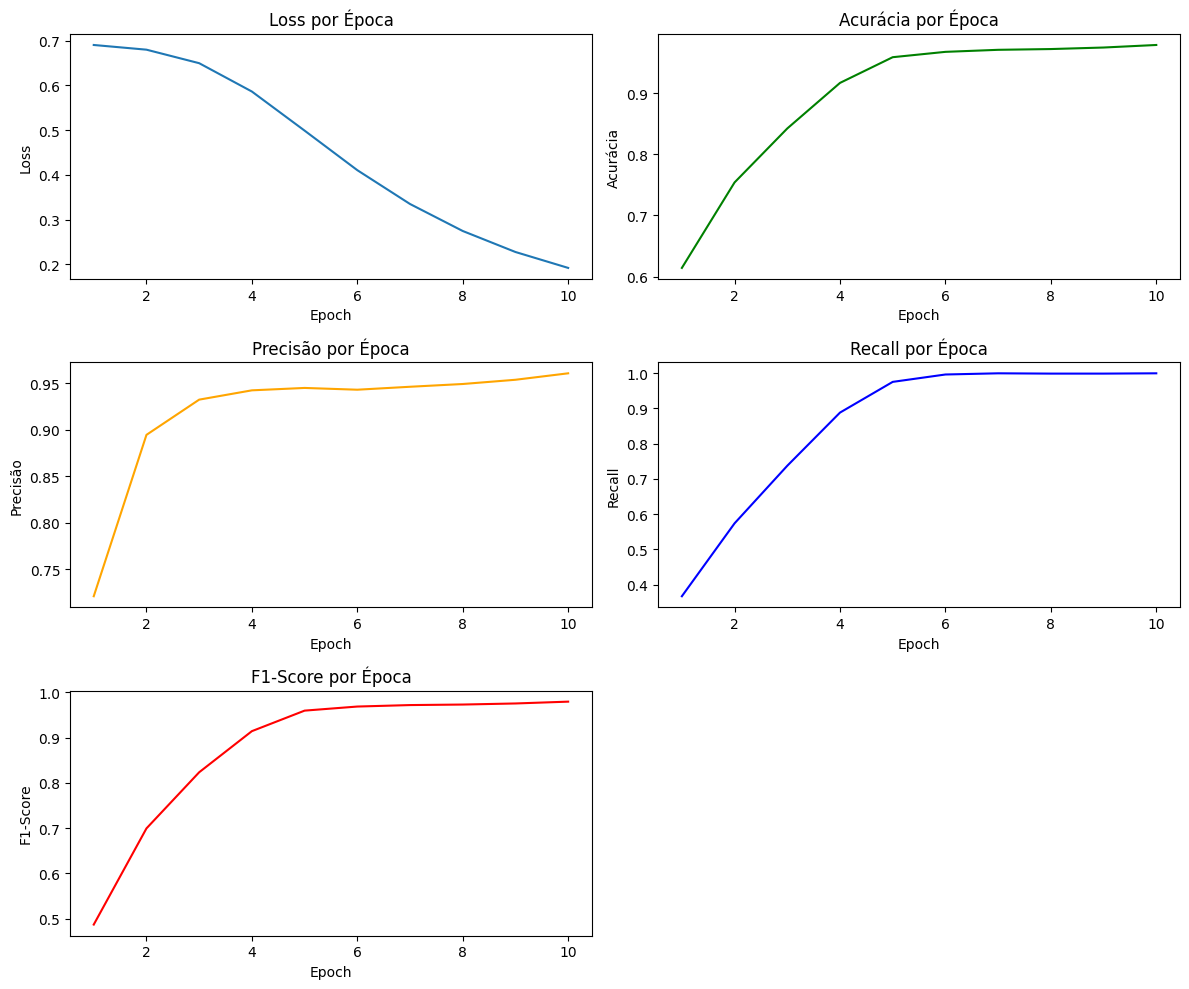

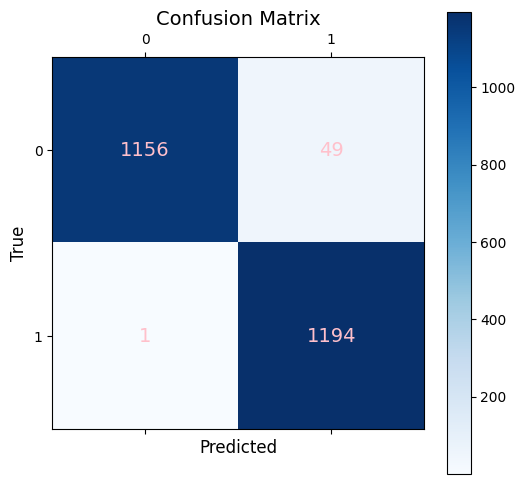

In [ ]:
# Plotar os gráficos de progresso das métricas e do loss
plt.figure(figsize=(12, 10))

# Loss
plt.subplot(3, 2, 1)
plt.plot(range(1, epochs + 1), epoch_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss por Época')

# Acurácia
plt.subplot(3, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, label='Acurácia', color='green')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')

# Precisão
plt.subplot(3, 2, 3)
plt.plot(range(1, epochs + 1), precisions, label='Precisão', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Precisão')
plt.title('Precisão por Época')

# Recall
plt.subplot(3, 2, 4)
plt.plot(range(1, epochs + 1), recalls, label='Recall', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall por Época')

# F1-Score
plt.subplot(3, 2, 5)
plt.plot(range(1, epochs + 1), f1_scores, label='F1-Score', color='red')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('F1-Score por Época')

plt.tight_layout()
plt.show()

#Plotar matriz de confusão
plot_confusion_matrix(TP, TN, FP, FN)


Métricas finais após o teste:
Acurácia no teste: 0.9733
Precisão no teste: 0.9587
Recall no teste: 0.9902
F1-Score no teste: 0.9742


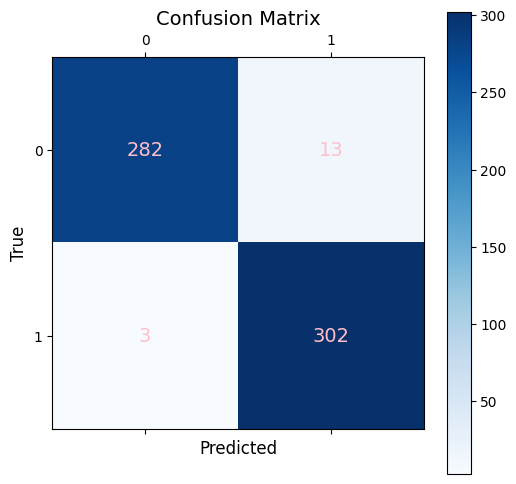

In [ ]:
# Lista para armazenar as perdas (loss) no conjunto de teste
test_losses = []
# Lista para armazenar as previsões feitas no conjunto de teste
y_test_pred = []
# Lista para armazenar os valores reais (rótulos) do conjunto de teste
y_test_true = []

# Avaliação da RNN no conjunto de teste
for i in range(len(X_test)):  # X_test contém os dados de teste
    inputs = [X_test.iloc[i].to_numpy()]  # Preparar entrada do teste
    target = y_test.iloc[i]  # Valor real de teste

    # Forward
    output, _ = lstm.forward(inputs, training=False)  # Set training=False para desabilitar dropout
    loss = -(target * np.log(output) + (1 - target) * np.log(1 - output))
    test_losses.append(np.squeeze(loss))

    # Armazenar as previsões e os valores reais
    y_test_pred.append(np.round(output).flatten())
    y_test_true.append(target.flatten())

# Calcular as métricas após o teste
y_test_pred = np.array(y_test_pred)
y_test_true = np.array(y_test_true)

accuracy, precision, recall, f1_score, TP, TN, FP, FN = calculate_metrics(y_test_true, y_test_pred)

# Impressão das métricas no conjunto de teste
print("\nMétricas finais após o teste:")
print(f"Acurácia no teste: {accuracy:.4f}")
print(f"Precisão no teste: {precision:.4f}")
print(f"Recall no teste: {recall:.4f}")
print(f"F1-Score no teste: {f1_score:.4f}")

# Opcional: plotar a matriz de confusão
plot_confusion_matrix(TP, TN, FP, FN)